In [6]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

import numpy as np
import seaborn as sns

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


Classes found: ['acai', 'pupunha', 'cupuacu', 'graviola', 'guarana', 'tucuma']


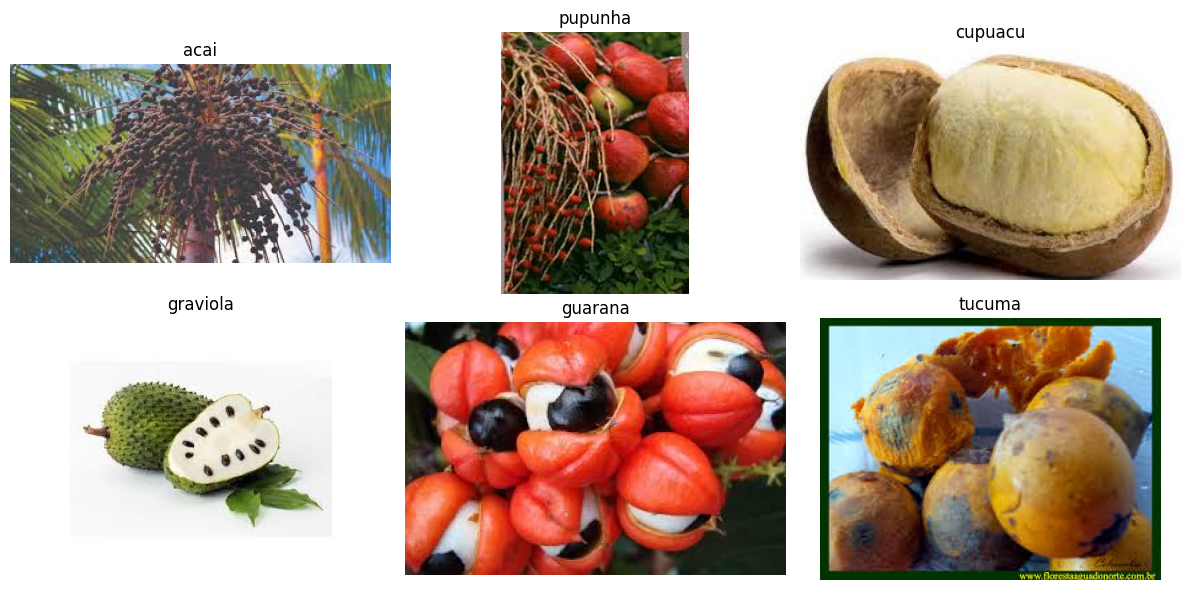

No corrupted images found.


In [7]:
# Set dataset paths
train_dir = "/content/drive/MyDrive/AI and ML/Week5/FruitinAmazon/train"
test_dir = "/content/drive/MyDrive/AI and ML/Week5/FruitinAmazon/test"

# Get the list of class directories
class_names = os.listdir(train_dir)
print("Classes found:", class_names)

sample_images = []
labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        images = os.listdir(class_path)
        if images:  # Check if images exist
            random_image = random.choice(images)
            sample_images.append(os.path.join(class_path, random_image))
            labels.append(class_name)

fig, axes = plt.subplots(2, len(sample_images) // 2 + len(sample_images) % 2, figsize=(12, 6))

for ax, img_path, label in zip(axes.flat, sample_images, labels):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis("off")

plt.tight_layout()
plt.show()

from PIL import Image

corrupted_images = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = Image.open(img_path)  # Attempt to open image
                img.verify()  # Verify image integrity
            except (IOError, SyntaxError):
                corrupted_images.append(img_path)
                os.remove(img_path)
                print(f"Removed corrupted image: {img_path}")

if not corrupted_images:
    print("No corrupted images found.")

In [8]:
# Define your input dimension and number of classes
input_dimension = 784  # Example: For MNIST dataset (28x28 pixels flattened)
num_classes = 10       # Example: For digits 0-9

# Create a sequential model
model = models.Sequential([
    # Example architecture for a simple classification model
    layers.Dense(128, activation='relu', input_shape=(input_dimension,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

# Now compile the model
model.compile(
    optimizer='adam',  # Adam optimizer is widely used and efficient
    loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']  # We want to track accuracy during training
)

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Found 90 files belonging to 6 classes.
Found 30 files belonging to 6 classes.
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.1487 - loss: 2.1484 - val_accuracy: 0.1667 - val_loss: 1.8276
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.2450 - loss: 1.8151 - val_accuracy: 0.2667 - val_loss: 1.6870
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3675 - loss: 1.6559 - val_accuracy: 0.5000 - val_loss: 1.5603
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 974ms/step - accuracy: 0.4455 - loss: 1.5452 - val_accuracy: 0.7000 - val_loss: 1.3383
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 950ms/step - accuracy: 0.5173 - loss: 1.3549 - val_accuracy: 0.5667 - val_loss: 1.1182
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6057 - loss: 1.0821 - val_accuracy: 0.5667 - val_loss: 0.9813
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5668 - loss: 1.0463 - val_accuracy: 0.7333 - val_loss: 0.8937
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accur

Model saved successfully as fruit_classification_model.h5


Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
              precision    recall  f1-score   support

        acai       0.71      1.00      0.83         5
     cupuacu       0.60      0.60      0.60         5
    graviola       0.67      0.80      0.73         5
     guarana       0.80      0.80      0.80         5
     pupunha       0.80      0.80      0.80         5
      tucuma       1.00      0.40      0.57         5

    accuracy                           0.73        30
   macro avg       0.76      0.73      0.72        30
weighted avg       0.76      0.73      0.72        30



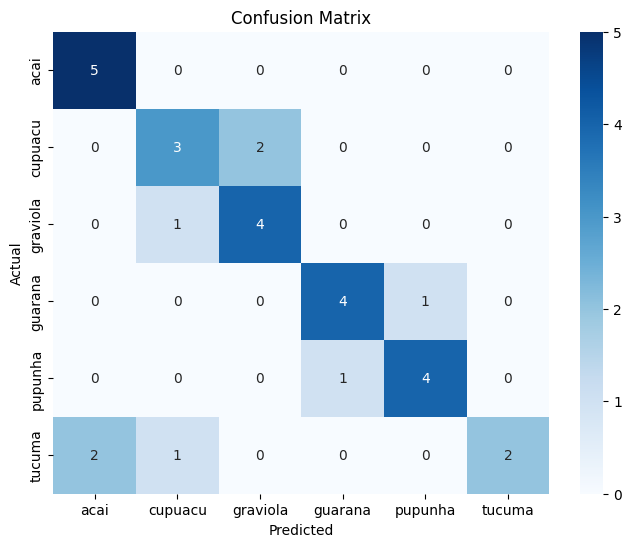

In [9]:
# Image size and batch size
img_size = (128, 128)
batch_size = 32

# Load datasets using image_dataset_from_directory
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'  # Ensures categorical labels for multi-class classification
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=False
)

# Extract class names separately
class_names = train_data.class_names
num_classes = len(class_names)  # Get number of classes dynamically

# Normalize images (scaling pixel values to [0,1])
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))

# CNN Model
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),  # Input layer
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Output layer
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(train_data, validation_data=test_data, epochs=10)

# Save the trained model in .h5 format
model.save("fruit_classification_model.h5")
print("Model saved successfully as fruit_classification_model.h5")

# Load the saved model (for verification)
loaded_model = load_model("fruit_classification_model.h5")
print("Model loaded successfully!")

# Model Evaluation
y_true = np.concatenate([y.numpy().argmax(axis=1) for _, y in test_data])
y_pred = np.argmax(model.predict(test_data), axis=1)

# Print Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
